<a href="https://colab.research.google.com/github/abdooussan/Python-libraries/blob/main/NLP_preprocessing_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><b><font size="6">NLP_preprocessing_Lab1</font></b></strong>

#add your Name
<strong><b><font size="4">Name :Aboulhassan Abderrahmane.</font></b></strong>

<h1>To do tasks <span class="tocSkip"></span></h1>
    <li> Lower casing
    <li> Punctuation removal
    <li> Identifying and Remove Stop Words
    <li> Tokenize Text in Words
    <li> NLTK Word Stemming
    <li> Build a bag-of-words
    <li> Create Term Frequency-Inverse Document Frequency (TF-IDF)
    <li> Bag of words
  

## Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Download and Inspect the IMDB Movie Reviews Dataset
- Labeled movie reviews data as either positive or negative reviews
- We can download the __movie_reviews__ package using the nltk.download function:

In [ ]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
from nltk.corpus import movie_reviews

In [ ]:
len(movie_reviews.fileids())

2000

In [ ]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [ ]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

- __fileids__ can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [ ]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [ ]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

- We can inspect one of the reviews using the raw method of movie_reviews, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

In [ ]:
print(movie_reviews.raw(fileids=positive_fileids[20]))

by phil curtolo mel gibson ( braveheart ) gave a gripping performance as the father of a young kidnapped boy in ron howard's ransom . 
gibson plays tom mullen , a wealthy business tycoon whose past actions are coming back to haunt him as a deranged psychopath , played by gary sinise ( forrest gump ) , and his band of low-life thugs kidnap his only son for $2 million . 
tom and his wife , kate , played by rene russo ( tin cup ) were instructed not to inform the police , but they contacted the fbi . 
minutes later , an elite team of agents led by delroy lindo ( broken arrow ) are in tom's house and wiring every phone . 
the plot sounds average , just like most other kidnap movies that you've already seen , and it was nothing more than that . 
that is until about half-way through the movie . 
suddenly , tom goes to the fox 5 news room and makes a live broadcast saying , " this is your ransom . 
but this is as close as you will ever get to it . 
instead , i am offering this money as a rewa

In [ ]:
negative_fileids[2]

'neg/cv002_17424.txt'

In [ ]:
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [ ]:
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [ ]:
data = pd.concat([positive_features, negative_features], ignore_index=True)


In [ ]:
data

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
1997,the kids in the hall are an acquired taste . \...,neg
1998,there was a time when john carpenter was a gre...,neg


### Lower casing

In [ ]:
data['review'] = data['review'].str.lower()#Use .str.lower instead of just .lower
#the code with lambda function
data['review'][0]

'films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this seem

### Remove punctuation

In [ ]:
data.review[2]

"you've got mail works alot better than it deserves to . \nin order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . \nno real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . \nessentially , it goes against and defies all concepts of good contemporary filmmaking . \nit's overly sentimental and at times terribly mushy , not to mention very manipulative . \nbut oh , how enjoyable that manipulation is . \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . \nit couldn't have been the directing , because both films were helmed by the same woman . \ni haven't quite yet figured out wh

In [ ]:
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
import re

In [ ]:
#remove punctuation
data['review'] = data['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [ ]:
#verification
data.review[2]

'youve got mail works alot better than it deserves to  \nin order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  \nno real acting was involved and there is not an original or inventive bone in its body  its basically a complete reshoot of the shop around the corner  only adding a few modern twists   \nessentially  it goes against and defies all concepts of good contemporary filmmaking  \nits overly sentimental and at times terribly mushy  not to mention very manipulative  \nbut oh  how enjoyable that manipulation is  \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  \nit couldnt have been the directing  because both films were helmed by the same woman  \ni havent quite yet figured out what i liked so much about yo

### Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”).
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

__Download and check stopwords from nltk:__

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
print('Total stop words:',len(stop))

Total stop words: 198


__Removing stopwords from reviews:__

In [ ]:

def remove_stopwords(review):
    return " ".join([word for word in str(review).split() if word not in stop])
#here we have implemented a custom function that will split each word from the text and check whether it is a stopword or not.
#If not then pass as it is in string and if stopword then removes it.
data['review'] = data['review'].apply(lambda x: remove_stopwords(x))

In [ ]:
#verification
data.review[2]

'youve got mail works alot better deserves order make film success cast two extremely popular attractive stars share screen two hours collect profits real acting involved original inventive bone body basically complete reshoot shop around corner adding modern twists essentially goes defies concepts good contemporary filmmaking overly sentimental times terribly mushy mention manipulative oh enjoyable manipulation must something casting manipulation makes movie work well absolutely hated previous ryanhanks teaming sleepless seattle couldnt directing films helmed woman havent quite yet figured liked much youve got mail really important like something much even question storyline cliched come tom hanks plays joe fox insanely likeable owner discount book chain meg ryan plays kathleen kelley even insanely likeable proprietor familyrun childrens book shop called nice homage shop around corner fox kelley soon become bitter rivals new fox books store opening right across block small business li

### Tokenize Text in Words
- Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.
- You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs.
- NLTK is shipped with sentence tokenizer and word tokenizer.
- Non english text can also be tokenized by specifying the language

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

__Word Tokenizing:__

In [ ]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

### NLTK Word Stemming
- Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.
- Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.
- There are many algorithms for stemming, but the most used algorithm is Porter stemming algorithm.
- NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

In [ ]:
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["review"] = data["review"].apply(lambda x: stem_words(x))

### Lemmatizing Words Using [WordNet](https://wordnet.princeton.edu/)

__Wordnet:__
- WordNet is a lexical database for the English language.
- It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members.
- WordNet can thus be seen as a combination of dictionary and thesaurus. While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

__Lemmatization:__
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices.
- It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
- Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["review"] = data["review"].apply(lambda text: lemmatize_words(text))

In [ ]:
data.to_csv('review_cleaned.csv')

__Bag of Words using CountVectorizer:__


### Term Frequency and Inverse Document Frequency
- Term Frequency measures how frequently a term occurs in a document.
- Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

        TF(t) = (Number of times term t appears in a document)

- Inverse Document Frequency measures how important a term is. While computing TF, all terms are considered equally important.
- However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

        IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to the corpus
vectorizer.fit(data['review'])

# transform the corpus into a matrix of TF-IDF features
tf_idf_matrix = vectorizer.transform(data['review'])
tf_idf_matrix.toarray()


array([[0.06676669, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## WordCloud

create WordCloud for movies reviews

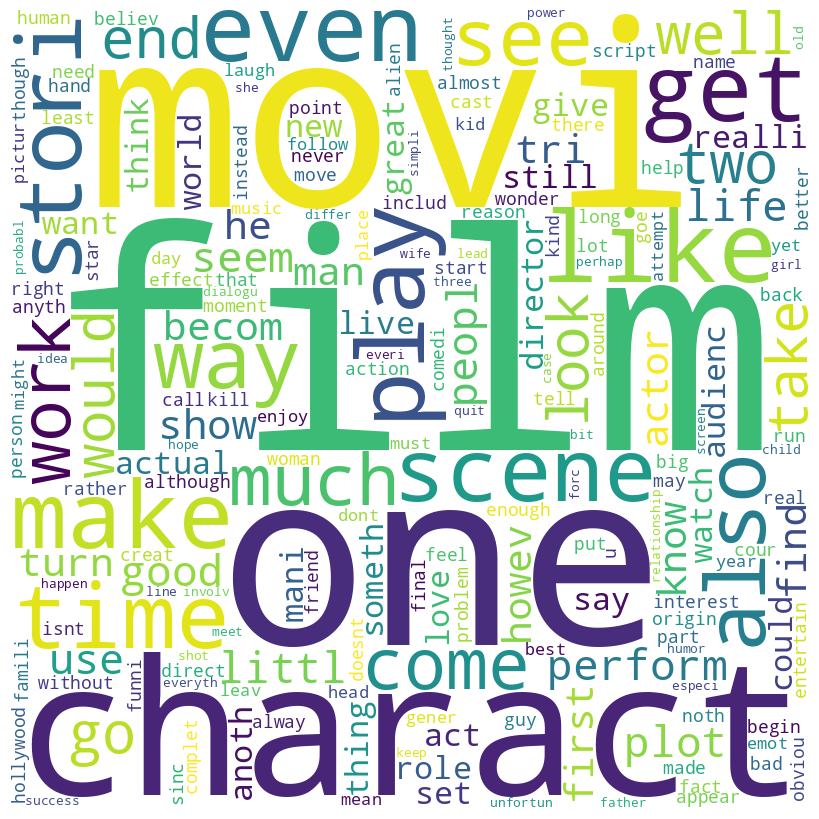

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set()).generate(" ".join(data['review']))

# display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# CountVectorizer()

CountVectorizer() is a text feature extraction tool in Python's scikit-learn library that converts a collection of text documents into a matrix of token counts. Here are some of its most important parameters:

input: This parameter accepts the input data that will be used to generate the vectorized output. It can take a list of strings or a file object that contains the text data.

stop_words: This parameter is used to specify a set of stop words to be removed from the text data. Stop words are typically common words like "the" or "and" that are unlikely to be useful in modeling. If you set this parameter to "english", CountVectorizer will use a built-in set of English stop words.

min_df and max_df: These parameters are used to filter out terms that appear too infrequently or too frequently in the input data. min_df specifies the minimum number of documents that a term must appear in to be included in the output, while max_df specifies the maximum proportion of documents that a term can appear in before it is excluded. Both parameters can be specified as either an integer count or a floating-point proportion.

ngram_range: This parameter is used to specify the range of n-gram sizes to be used in the vectorization. An n-gram is a sequence of n words from the text data. For example, an n-gram of size 2 (a "bigram") would consist of two-word sequences like "the cat" or "cat in". ngram_range is specified as a tuple of integers (n_min, n_max), where n_min is the minimum n-gram size and n_max is the maximum.

tokenizer: This parameter is used to specify a custom tokenizer function to use instead of the default tokenization method. The function should take a single string as input and return a list of tokens.

lowercase: This parameter is used to specify whether or not to convert all text to lowercase before tokenizing. If set to True, all text will be lowercased. If set to False, the original case of the text will be preserved.


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
corpus=data["review"]
count_vector = CountVectorizer(stop_words="english",min_df=.2 ,max_df=.5 )

In [ ]:
word_count = count_vector.get_feature_names_out()
print(word_count)

NotFittedError: Vocabulary not fitted or provided

In [ ]:
doc_array =  count_vector.fit_transform(corpus).toarray()
doc_array

In [ ]:
frequency_matrix = pd.DataFrame(doc_array,columns=count_vector.get_feature_names_out())
frequency_matrix

#positive word could:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set()).generate(" ".join(data.query("label=='pos'")['review']))

# display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#negative word could

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set()).generate(" ".join(data.query("label=='neg'")['review']))

# display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
count_vector.vocabulary_

 #Term Frequency-Inverse Document Frequency (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
print('Tfidf ponderations')


# Initialize the "TfidfVectorizer" object.
tfidf_vect = TfidfVectorizer(min_df=0.1)
X_tfidf = tfidf_vect.fit_transform(data['review'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = X_tfidf.toarray()
tfidf_frequency_matrix = pd.DataFrame(vectorizer_features,columns=tfidf_vect.get_feature_names_out())
tfidf_frequency_matrix

In [ ]:
# get feature names
feature_names = np.array(tfidf_vect.get_feature_names_out())
sorted_by_idf = np.argsort(tfidf_vect.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

## Text categorisation


In [ ]:
data_cleaned = pd.read_csv('review_cleaned.csv', usecols=['label','review'])

In [ ]:
data_cleaned

In [ ]:
#frequency distribution of the class attribute
print(pd.crosstab(index=data_cleaned["label"],columns="count"))

In [ ]:
x=data_cleaned['review']
y=data_cleaned['label']

In [ ]:
x

In [ ]:

data_cleaned

In [ ]:
label_map = {'neg': 0, 'pos': 1}

# Use map() to apply the label_map to the 'label' colum
data_cleaned['label'] =data_cleaned['label'].map(label_map)

In [ ]:
data_cleaned

In [ ]:
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(data_cleaned,train_size=0.8,random_state=1,stratify=data_cleaned['label'])

### Generate the document term matrix - train set

In [ ]:
#*** Generate the document term matrix - train set ***

#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer

#instantiation of the objet
parseur = CountVectorizer(min_df=0.05)

#create the document term matrix
XTrain = parseur.fit_transform(Train['review'])

In [ ]:
#list of tokens
print(parseur.get_feature_names_out())

In [ ]:
#mdt_bis
mdtTrain = XTrain.toarray()

In [ ]:
frequency_matrix = pd.DataFrame(mdtTrain,columns=parseur.get_feature_names_out())
frequency_matrix

### train the classifier


1-KNN

In [ ]:
#import the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#instatiate the object
knn_classifier = KNeighborsClassifier(n_neighbors=2)

#perform the training process
knn_classifier.fit(mdtTrain,Train['label'])


In [ ]:
from sklearn import metrics

#create the document term matrix
mdtTest = parseur.transform(Test['review'])



In [ ]:
#prediction for the test set
predTest = knn_classifier.predict(mdtTest)

#confusion matrix
print('***Confusion matrix')
mcTest= metrics.confusion_matrix(Test['label'],predTest)
print(mcTest)

In [ ]:
#accuracy rate
print('accuracy rate -->')
print(metrics.accuracy_score(Test['label'],predTest))

In [ ]:
#recall
print('Recall')
print(metrics.recall_score(Test['label'],predTest))


In [ ]:
#precision
print('precision')
print(metrics.precision_score(Test['label'],predTest))

In [ ]:
predTest

## LR


In [ ]:
#*** train the classifier

#import the class LogistiRegression
from sklearn.linear_model import LogisticRegression

#instatiate the object
modelBis = LogisticRegression()

#perform the training process
modelBis.fit(mdtTrain,Train['label'])

#generate the document term matrix for the test set
#using the object learned from the train set


#import the metrics class for the performance measurement
from sklearn import metrics

#create the document term matrix for test
mdtTest = parseur.transform(Test['review'])

#prediction for the test set
predTest = modelBis.predict(mdtTest)

#confusion matrix
print('***Confusion matrix')
mcTest = metrics.confusion_matrix(Test['label'],predTest)
print(mcTest)

#accuracy rate
print('accuracy rate')
print(metrics.accuracy_score(Test['label'],predTest))

#recall
print('Recall')
print(metrics.recall_score(Test['label'],predTest))

#precision
print('precision')
print(metrics.precision_score(Test['label'],predTest))

#F1-Score
print('F1-Score')
print(metrics.f1_score(Test['label'],predTest))


### deployment

In [ ]:
#document to classify
doc = [' I would highly recommend it to anyone looking for a charming and delightful film experience']

#get its description
desc = parseur.transform(doc)
print(desc)

In [ ]:
#dense representation
dense_desc = desc.toarray()

In [ ]:
#prediction of the class membership
pred_doc = knn_classifier.predict(dense_desc)
print(pred_doc)